<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 // Statistical Treatment for Datasets</font></h1>

## Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

This dataset contains:
    
Input variables:

**Bank client data:** 
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:** 
1. contact: contact communication type (categorical: 'cellular','telephone')
2. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
3. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
4. duration: last contact duration, in seconds (numeric). 
    Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other atributes:** 
1. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
3. previous: number of contacts performed before this campaign and for this client (numeric)
4. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes:** 
1. emp.var.rate: employment variation rate - quarterly indicator (numeric)
2. cons.price.idx: consumer price index - monthly indicator (numeric)
3. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
4. euribor3m: euribor 3 month rate - daily indicator (numeric)
5. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):** 
1. y - has the client subscribed a term deposit? (binary: 'yes','no')

## Data Preparation

Load the library you need

Get your Bank Marketing Dataset from [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) and load the dataframe to your notebook.

In [1]:
# Get your import statement here
from time import time
from six import StringIO
from sklearn import tree
from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use("ggplot")

In [2]:
# Load your dataset here
df_bank = pd.read_csv("data/bank-additional-full.csv", sep=";")
print ('Data read into a pandas dataframe!')

df_bank

Data read into a pandas dataframe!


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
df_bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


To view the dimensions of the dataframe, we use the `.shape` parameter.

In [5]:
df_bank.shape

(41188, 21)

Let's view Dtype of each features in dataframe using `.info()` function.

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Exploratory & Preprocessing Data

Our dataset is ready for checking missing values.

In [7]:
print("Check if any column has null values :")
print(df_bank.isnull().sum())

Check if any column has null values :
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
print("Describe categorical data:")
df_bank.describe(exclude = "number")

Describe categorical data:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [9]:
print("Describe numerical data:")
df_bank.describe()

Describe numerical data:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Vizualisation Data

### Pie Chart

In [10]:
df_bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

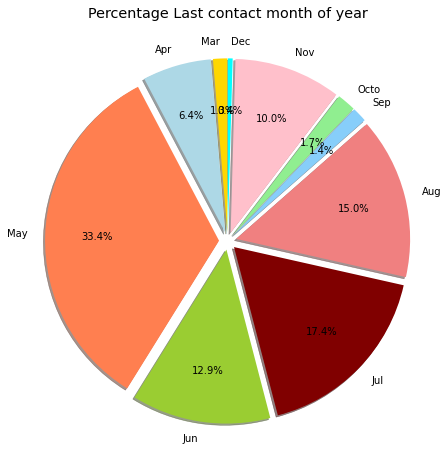

In [11]:
mar = df_bank.loc[df_bank['month'] == 'mar'].count()[0]
apr = df_bank.loc[df_bank['month'] == 'apr'].count()[0]
may = df_bank.loc[df_bank['month'] == 'may'].count()[0]
jun = df_bank.loc[df_bank['month'] == 'jun'].count()[0]
jul = df_bank.loc[df_bank['month'] == 'jul'].count()[0]
aug = df_bank.loc[df_bank['month'] == 'aug'].count()[0]
sep = df_bank.loc[df_bank['month'] == 'sep'].count()[0]
octo = df_bank.loc[df_bank['month'] == 'oct'].count()[0]
nov = df_bank.loc[df_bank['month'] == 'nov'].count()[0]
dec = df_bank.loc[df_bank['month'] == 'dec'].count()[0]
data_month = [mar, apr, may, jun, jul, aug, sep, octo, nov, dec]

labels = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Octo', 'Nov', 'Dec']
colors = ["gold", "lightblue", "coral", "yellowgreen", "maroon", "lightcoral", "lightskyblue", "lightgreen", "pink", "cyan"]
explode_sequence = ('0.1,' * 10).split(',')
explode_sequence = [float(item) for item in explode_sequence if item !=""]

plt.pie(data_month, labels=labels, colors=colors, radius=2, autopct='%1.1f%%', explode=explode_sequence,
        shadow=True, startangle=90, pctdistance=0.7)

plt.title("Percentage Last contact month of year", y=1.5)
plt.show()

**Insight:**
The mostly of last contact is in May with percentage amount equal to 33.4%

### Bar Char

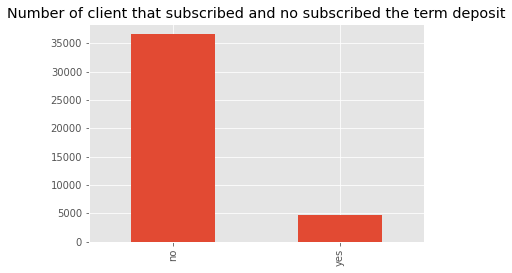

In [12]:
df_bank["y"].value_counts().plot(kind="bar")
plt.title("Number of client that subscribed and no subscribed the term deposit")
plt.show()

**Insight:**
mostly the client do not subscribe the term deposit

## Next Preprocessing Data

Let's see the unique of the categorical attributes

In [13]:
df_bank.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [14]:
df_bank.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [15]:
df_bank.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [16]:
df_bank.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [17]:
df_bank.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [18]:
df_bank.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [19]:
df_bank.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [20]:
df_bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [21]:
df_bank.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [22]:
df_bank.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

Drop attributes that have no potential to enter into the model

In [23]:
df_bank=df_bank.drop(columns=['contact','month','day_of_week','poutcome'])
df_bank

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes


Change the categorical attribute to the numerical attribute

In [24]:
df_bank["job_"] = df_bank["job"].replace({"housemaid": 0, "services": 1, "admin.": 2, "blue-collar": 3, "technician": 4, "retired": 5, "management": 6, "unemployed": 7, "self-employed": 8, "entrepreneur": 9, "student": 10, "unknown": 99})
df_bank["marital_"] = df_bank["marital"].replace({"married": 0, "single": 1, "divorced": 2, "unknown": 99})
df_bank["education_"] = df_bank["education"].replace({"basic.4y": 0, "high.school": 1, "basic.6y": 2, "basic.9y": 3, "professional.course": 4, "university.degree": 5, "illiterate": 6, "unknown": 99})
df_bank["default_"] = df_bank["default"].replace({"no": 0, "yes": 1, "unknown": 99})
df_bank["housing_"] = df_bank["housing"].replace({"no": 0, "yes": 1, "unknown": 99})
df_bank["loan_"] = df_bank["loan"].replace({"no": 0, "yes": 1, "unknown": 99})

In [25]:
df_bank = df_bank.drop(["job", "marital", "education", "default", "housing", "loan"], axis=1)
df_bank

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_,marital_,education_,default_,housing_,loan_
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,99,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,2,0,2,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,5,0,4,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,3,0,4,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,5,0,5,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,4,0,4,0,0,0


## Confusion Matrix Regression

In [26]:
X = df_bank.drop(["y"], axis=1)
y = df_bank["y"]

In [27]:
model = LogisticRegression(solver="liblinear", random_state=1)

model.fit(X, y)

prediction = model.predict(X)

In [28]:
print("List of classes:", model.classes_)

List of classes: ['no' 'yes']


In [29]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [0.00252176]
Coefficients: [[ 0.00381376  0.00450537 -0.04977372 -0.00164782  0.00330698 -0.23309225
   0.2062131   0.03977115 -0.25129385 -0.00372855  0.00353125  0.00100841
   0.00198348 -0.00562486  0.00418252 -0.00475958]]


In [30]:
print("label:", y, sep="\n")
print("prediction:", prediction, sep="\n")

label:
0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object
prediction:
['no' 'no' 'no' ... 'no' 'no' 'no']


In [31]:
model.predict_proba(X) * 100

array([[96.08593658,  3.91406342],
       [98.59751643,  1.40248357],
       [96.83580775,  3.16419225],
       ...,
       [83.66476823, 16.33523177],
       [62.23003681, 37.76996319],
       [80.02771991, 19.97228009]])

In [32]:
(1*model.coef_ + model.intercept_)

array([[ 0.00633552,  0.00702713, -0.04725196,  0.00087394,  0.00582874,
        -0.23057048,  0.20873486,  0.04229291, -0.24877208, -0.00120679,
         0.00605301,  0.00353017,  0.00450524, -0.0031031 ,  0.00670428,
        -0.00223782]])

In [33]:
acc_score = model.score(X, y)
print("accuracy score:", acc_score)

accuracy score: 0.9093425269495969


In [34]:
confusion_matrix(y, prediction)

array([[35659,   889],
       [ 2845,  1795]], dtype=int64)

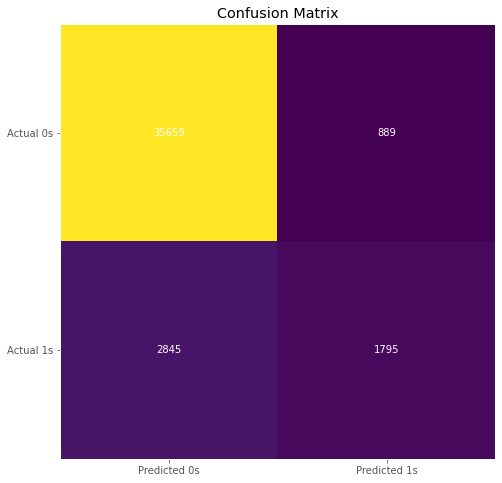

In [35]:
confusion = confusion_matrix(y, prediction)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion[i, j], ha="center", va="center", color="white")
plt.title("Confusion Matrix")
plt.show()

In [36]:
print(classification_report(y, prediction))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95     36548
         yes       0.67      0.39      0.49      4640

    accuracy                           0.91     41188
   macro avg       0.80      0.68      0.72     41188
weighted avg       0.90      0.91      0.90     41188



## Def Train Model

In [37]:
X = df_bank.drop(["y"], axis=1)
y = df_bank["y"]
    
def train_model(X, y, model, test_size=.3):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=109
    )
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_test.shape[0]}..")
    
    print("Standardizing data..")
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    start = time()
    model.fit(scaled_X_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_prediction = model.predict(scaled_X_train)
    test_prediction = model.predict(scaled_X_test)

    print("Training performance:")
    print(classification_report(y_train, train_prediction))

    print("Testing performance:")
    print(classification_report(y_test, test_prediction))

## Logistic Regression

In [38]:
train_model(X, y, LogisticRegression())

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training LogisticRegression in 0.122s
Training performance:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95     25557
         yes       0.68      0.41      0.51      3274

    accuracy                           0.91     28831
   macro avg       0.80      0.69      0.73     28831
weighted avg       0.90      0.91      0.90     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10991
         yes       0.63      0.39      0.48      1366

    accuracy                           0.91     12357
   macro avg       0.78      0.68      0.71     12357
weighted avg       0.89      0.91      0.90     12357



## Gaussian Naive Bayes

In [39]:
train_model(X,y,GaussianNB())

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training GaussianNB in 0.028s
Training performance:
              precision    recall  f1-score   support

          no       0.95      0.90      0.92     25557
         yes       0.44      0.61      0.51      3274

    accuracy                           0.87     28831
   macro avg       0.69      0.75      0.72     28831
weighted avg       0.89      0.87      0.88     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.95      0.89      0.92     10991
         yes       0.40      0.59      0.48      1366

    accuracy                           0.86     12357
   macro avg       0.68      0.74      0.70     12357
weighted avg       0.89      0.86      0.87     12357



## Random Forest

In [40]:
train_model(X, y, RandomForestClassifier())

Feature_importance = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
Feature_importance

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training RandomForestClassifier in 2.513s
Training performance:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     25557
         yes       1.00      1.00      1.00      3274

    accuracy                           1.00     28831
   macro avg       1.00      1.00      1.00     28831
weighted avg       1.00      1.00      1.00     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95     10991
         yes       0.61      0.51      0.56      1366

    accuracy                           0.91     12357
   macro avg       0.78      0.74      0.75     12357
weighted avg       0.90      0.91      0.91     12357



duration          0.342349
euribor3m         0.127732
age               0.099029
nr.employed       0.067805
job_              0.053577
education_        0.043673
pdays             0.043380
campaign          0.042045
cons.conf.idx     0.033605
emp.var.rate      0.033467
cons.price.idx    0.026379
marital_          0.023151
housing_          0.021036
previous          0.018231
loan_             0.015142
default_          0.009400
dtype: float64

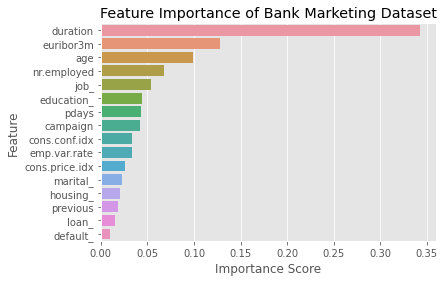

In [41]:
sns.barplot(x=Feature_importance, y=Feature_importance.index)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance of Bank Marketing Dataset")
plt.show()

**Insight:**
Based on the Random Forest algorithm, the most important feature is duration with score 34%

## Decision Tree

In [42]:
df_bank

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_,marital_,education_,default_,housing_,loan_
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,99,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,2,0,2,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,5,0,4,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,3,0,4,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,5,0,5,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,4,0,4,0,0,0


In [43]:
df_bank_DT = df_bank
df_bank_DT["y_"] = df_bank_DT["y"].replace({"no": 0, "yes": 1})
df_bank_DT

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_,marital_,education_,default_,housing_,loan_,y_
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,99,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,2,0,2,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,5,0,4,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,3,0,4,0,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,5,0,5,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,4,0,4,0,0,0,1


In [44]:
df_bank_DT=df_bank_DT.drop(columns=['y'])
df_bank_DT

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_,marital_,education_,default_,housing_,loan_,y_
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1,99,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,2,0,2,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,0,4,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,3,0,4,0,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,0,5,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,4,0,4,0,0,0,1


In [45]:
feat_cols = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
             "euribor3m", "nr.employed", "job_", "marital_", "education_", "default_", "housing_", "loan_"]
X = df_bank_DT[feat_cols]
y = df_bank_DT.y_

In [46]:
model = DecisionTreeClassifier(random_state=11)
train_model(X, y, model)

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training DecisionTreeClassifier in 0.111s
Training performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25557
           1       1.00      1.00      1.00      3274

    accuracy                           1.00     28831
   macro avg       1.00      1.00      1.00     28831
weighted avg       1.00      1.00      1.00     28831

Testing performance:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10991
           1       0.48      0.51      0.50      1366

    accuracy                           0.89     12357
   macro avg       0.71      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



In [47]:
def visualize_tree(model, class_names):
    dot_data = StringIO()
    tree.export_graphviz(model, class_names=["0", "1"], out_file=dot_data,
                         feature_names=feat_cols, filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training DecisionTreeClassifier in 0.053s
Training performance:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     25557
           1       0.66      0.57      0.61      3274

    accuracy                           0.92     28831
   macro avg       0.80      0.77      0.78     28831
weighted avg       0.91      0.92      0.91     28831

Testing performance:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10991
           1       0.61      0.53      0.56      1366

    accuracy                           0.91     12357
   macro avg       0.77      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



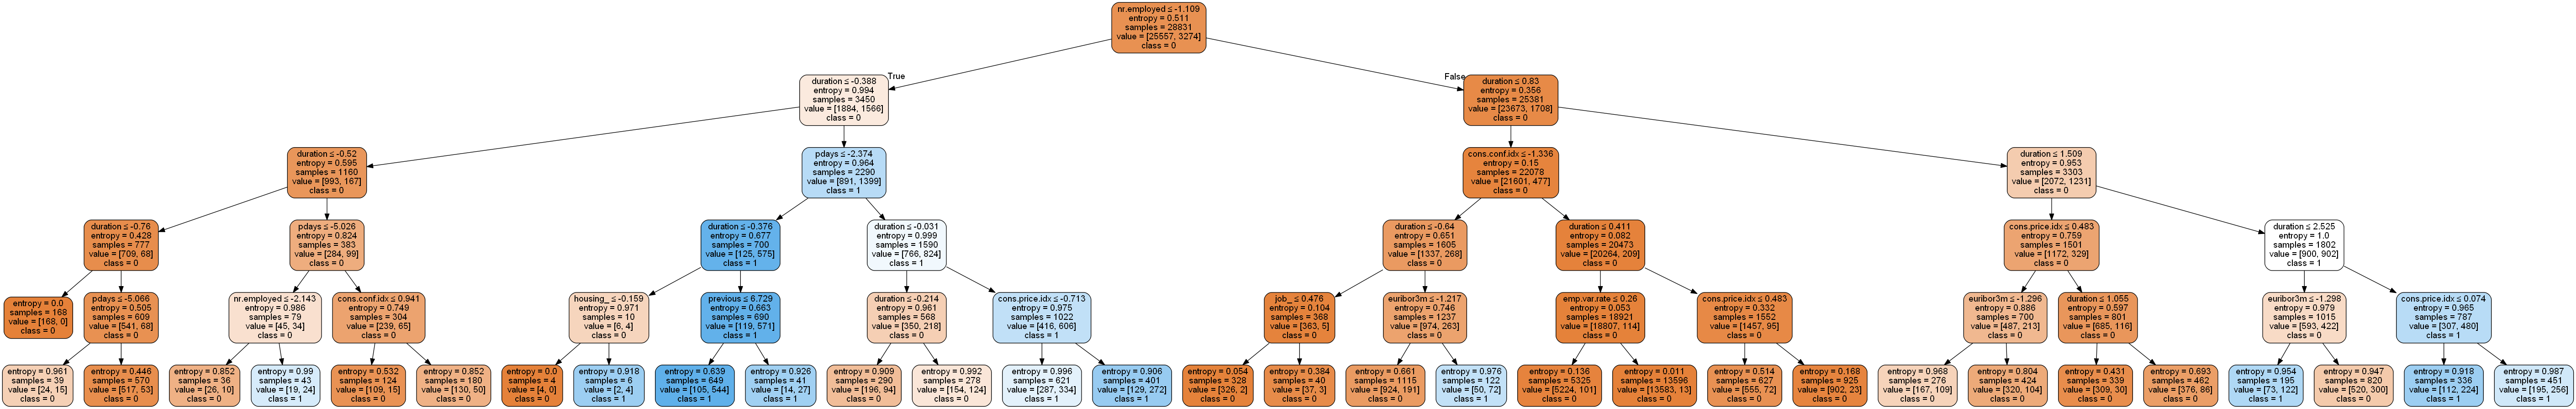

In [48]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
train_model(X, y, model)
graph = visualize_tree(model, ["0", "1"])
Image(graph)

## Support Vector Machines

In [49]:
df_bank

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_,marital_,education_,default_,housing_,loan_,y_
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,99,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,2,0,2,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,5,0,4,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,3,0,4,0,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,5,0,5,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,4,0,4,0,0,0,1


In [50]:
X = df_bank.drop(["y", "y_"], axis=1)
y = df_bank["y"]

In [51]:
train_model(X,y,SVC(kernel="linear"))

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training SVC in 20.182s
Training performance:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     25557
         yes       0.65      0.31      0.42      3274

    accuracy                           0.90     28831
   macro avg       0.78      0.64      0.68     28831
weighted avg       0.89      0.90      0.89     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     10991
         yes       0.61      0.28      0.38      1366

    accuracy                           0.90     12357
   macro avg       0.76      0.63      0.67     12357
weighted avg       0.88      0.90      0.88     12357



## K-Nearest Neighbors

In [52]:
df_bank=df_bank.drop(columns=['y_'])
df_bank

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_,marital_,education_,default_,housing_,loan_
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,99,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,2,0,2,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,5,0,4,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,3,0,4,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,5,0,5,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,4,0,4,0,0,0


In [53]:
X = df_bank.drop(["y"], axis=1)
y = df_bank["y"]

In [54]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state=1)
print(f"Training with: {len(X_train)}.. Validating with: {len(X_valid)}")

Training with: 28831.. Validating with: 12357


In [55]:
error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_valid)
    error.append(np.mean(prediction != y_valid))

print(error)

[0.1141862911709962, 0.10261390305090232, 0.1001052035283645, 0.09872946508052116, 0.09630169134903294, 0.09444039815489197, 0.09444039815489197, 0.09565428502063608, 0.09411669499069353, 0.0936311402443959, 0.09306465970704864, 0.09468317552804079, 0.09322651128914786, 0.09274095654285021, 0.09290280812494942, 0.09282188233389982, 0.09176984705025491, 0.09193169863235413, 0.09112244072185806, 0.09128429230395727, 0.08990855385611395, 0.09144614388605649, 0.0903941086024116, 0.09063688597556041, 0.09031318281136198, 0.09063688597556041, 0.08950392490086591, 0.08950392490086591, 0.08877559278141944, 0.08966577648296511, 0.09031318281136198, 0.09007040543821315, 0.09087966334870923, 0.0905559601845108, 0.08990855385611395, 0.0903941086024116, 0.08982762806506434, 0.08958485069191552, 0.08966577648296511]


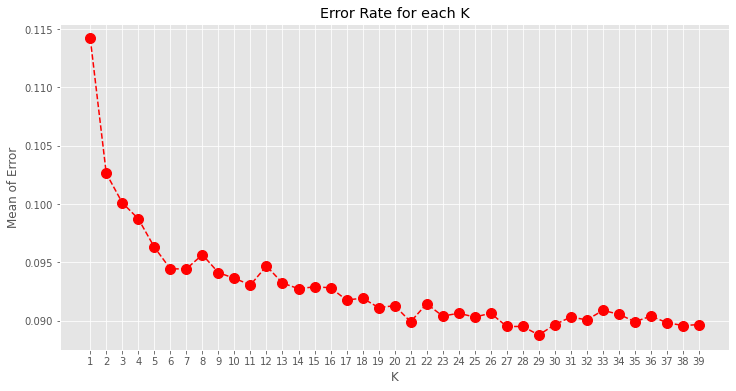

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color="r", linestyle="dashed", marker="o", markersize=10)
plt.title("Error Rate for each K")
plt.xlabel("K")
plt.xticks(range(1, 40))
plt.ylabel("Mean of Error")
plt.show()

In [57]:
k = 39
# define kNN model
model = KNeighborsClassifier(n_neighbors=k)

# train kNN -> store data and label
model.fit(X_train, y_train)

# predict
train_pred = model.predict(X_train)
valid_pred = model.predict(X_valid)

# classification report
print("Training performance:",
      classification_report(y_train, train_pred),
      sep="\n")
print("Validation performance:",
      classification_report(y_valid, valid_pred),
      sep="\n")

Training performance:
              precision    recall  f1-score   support

          no       0.94      0.97      0.95     25604
         yes       0.66      0.49      0.56      3227

    accuracy                           0.91     28831
   macro avg       0.80      0.73      0.76     28831
weighted avg       0.91      0.91      0.91     28831

Validation performance:
              precision    recall  f1-score   support

          no       0.94      0.97      0.95     10944
         yes       0.64      0.49      0.55      1413

    accuracy                           0.91     12357
   macro avg       0.79      0.73      0.75     12357
weighted avg       0.90      0.91      0.90     12357



## Comparing All Algorithms

In [58]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier()
]

In [59]:
for model in models:
    print(f"=== Using {model.__class__.__name__} ===")
    train_model(X, y, model)

=== Using LogisticRegression ===
Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training LogisticRegression in 0.124s
Training performance:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95     25557
         yes       0.68      0.41      0.51      3274

    accuracy                           0.91     28831
   macro avg       0.80      0.69      0.73     28831
weighted avg       0.90      0.91      0.90     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10991
         yes       0.63      0.39      0.48      1366

    accuracy                           0.91     12357
   macro avg       0.78      0.68      0.71     12357
weighted avg       0.89      0.91      0.90     12357

=== Using DecisionTreeClassifier ===
Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training DecisionTreeClassifier in 0.130s

**Conclusion** :
From the algorithm above, it can be seen that Logistic Regression is the best algorithm. Because stable accuracy of the model between training performance and development